# Assigment 7 - Issue [#979](https://github.com/alexanderquispe/Diplomado_PUCP/issues/979)
**Deadline: September 7th - 23:59**

Fernando Mendoza | Andrea Pezo | Michel Cotrina | Estefanny Gil | Armando Ore


1. Import the data located at [this link](https://github.com/alexanderquispe/Diplomado_PUCP/blob/main/_data/data_dengue_peru.csv). It has information on people infected with dengue at the district level for 2015 to 2021.

2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: [Use this code](https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column).

3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI).

4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the province level.

5. Use geopandas to plot the number of cases by the department for all the years using subplots. --Every subplot for each year. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the department level.

6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this [shapefile](https://github.com/alexanderquispe/Diplomado_PUCP/tree/main/_data/LIMITE_DISTRITAL_2020_INEI). For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.


## Step 0. Libraries

In [ ]:
#!pip install geopandas
#!pip install mapclassify

In [105]:
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import geopandas as gpd

## Step 1. Load data

In [ ]:
pwd

In [107]:
dengue = pd.read_csv( r"../../_data/data_dengue_peru.csv",
        dtype={'Ubigeo': 'str'}, 
        converters={'Casos': lambda x: float(x.replace(',', '')) if x != '' else np.nan})
dengue.head()

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0


## Step 2. Generate ubigeo for Departments and Provinces taking the first two and four numbers

In [109]:
# Generate department and province codes
dengue['Departamento_Ubigeo'] = dengue['Ubigeo'].str[:2]
dengue['Provincia_Ubigeo'] = dengue['Ubigeo'].str[:4]
dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Departamento_Ubigeo,Provincia_Ubigeo
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


## Step 3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend

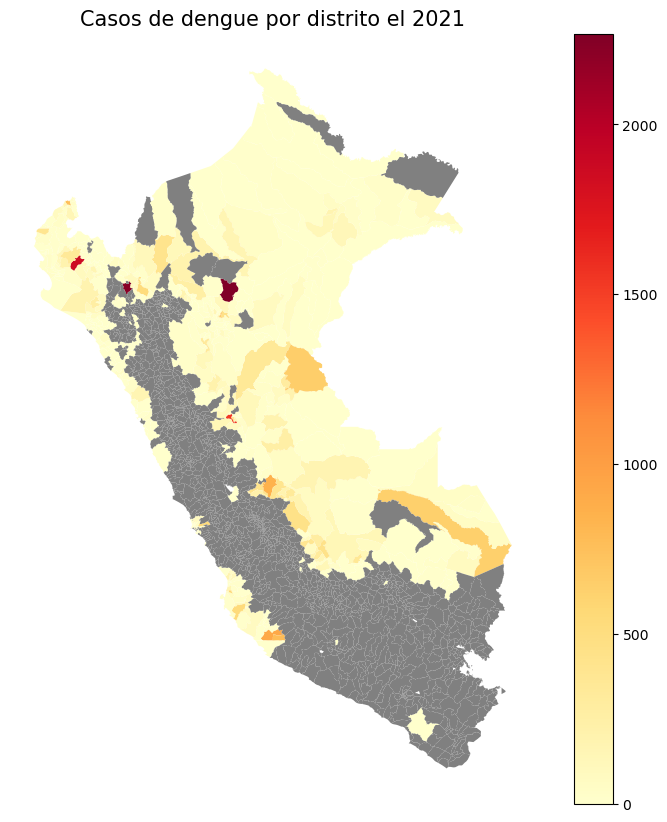

In [111]:
 # Filter dengue data in 2021
dengue_2021 = dengue[dengue['Año'] == 2021]

# Cases by district
cases_by_district = dengue_2021.groupby('Ubigeo')['Casos'].sum().reset_index()

# Load the shapefile
districts_gdf = gpd.read_file('../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

# Merge cases data with districts geodataframe using Ubigeo column
merged_gdf = districts_gdf.merge(cases_by_district, left_on='CODIGO', right_on='Ubigeo', how='left')

# Plot set up
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Map plot setting specifying color for NaN values
merged_gdf.plot(column='Casos', cmap='YlOrRd', legend=True,
               missing_kwds={"color": "grey", "label": "No data"},
               ax=ax)

# Add a title and adjust the legend
ax.set_title('Casos de dengue por distrito el 2021', fontsize=15)
ax.set_axis_off()  # Turn off the axis

plt.show()

## Step 4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dengue data file into the dengue DataFrame
dengue = pd.read_csv(r'../../_data/data_dengue_peru.csv',  
                     dtype={'Ubigeo': 'str'},  
                     converters={'Casos': lambda x: float(x.replace(',', '')) if x != '' else np.nan})  # Convert Casos to float

# Display the first few rows to confirm data is loaded correctly
display(dengue.head())


In [ ]:
# Filter data for 2021
dengue_2021 = dengue[dengue['Año'] == 2021]

# Aggregate cases by province using the "Provincia" column
cases_by_province = dengue_2021.groupby('Provincia')['Casos'].sum().reset_index()


In [ ]:
# Load the district-level shapefile (adjust the path as needed)
districts_gdf = gpd.read_file('../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

# Display columns to identify relevant fields
print(districts_gdf.columns)


In [ ]:
# Ensure the "Ubigeo" column is read correctly and create "Provincia_Ubigeo"
districts_gdf['Provincia_Ubigeo'] = districts_gdf['UBIGEO'].str[:4] 


In [ ]:
# Dissolve district-level shapefile to create province-level shapefile based on "Provincia_Ubigeo"
provinces_gdf = districts_gdf.dissolve(by='Provincia_Ubigeo', aggfunc='sum').reset_index()


In [ ]:
# Check columns in dengue DataFrame
print(dengue.columns)


In [ ]:
# Ensure 'Ubigeo' is read correctly as a string and create 'Provincia_Ubigeo'
dengue['Provincia_Ubigeo'] = dengue['Ubigeo'].str[:4]  # First four digits for province

# Display the first few rows to confirm the column was created correctly
display(dengue.head())


In [ ]:
# Map 'Provincia_Ubigeo' codes back to 'Provincia' names using the dengue data
province_map = dengue[['Provincia', 'Provincia_Ubigeo']].drop_duplicates().set_index('Provincia_Ubigeo')['Provincia'].to_dict()

# Map the provinces to the shapefile DataFrame
provinces_gdf['Provincia'] = provinces_gdf['Provincia_Ubigeo'].map(province_map)


In [ ]:
# Merge cases data with the province shapefile using the "Provincia" column
merged_gdf_province = provinces_gdf.merge(cases_by_province, on='Provincia', how='left')

# Plot setup
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Map plot setting specifying color for NaN values
merged_gdf_province.plot(column='Casos', cmap='YlOrRd', legend=True,
                         missing_kwds={"color": "grey", "label": "No data"},
                         ax=ax)

# Add a title and adjust the legend
ax.set_title('Dengue Cases by Province in 2021', fontsize=15)
ax.set_axis_off()  # Turn off the axis

plt.show()


## Step 5. Use geopandas to plot the number of cases by the department for all the years using subplots. --Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Upload dengue data
dengue = pd.read_csv(r'../../_data/data_dengue_peru.csv',  
                     dtype={'Ubigeo': 'str'},  
                     converters={'Casos': lambda x: float(x.replace(',', '')) if x != '' else np.nan})

# Generate the department code from the Ubigeo (first 2 digits)
dengue['Departamento_Ubigeo'] = dengue['Ubigeo'].str[:2]


In [27]:
# Load district shapefile (path provided)
districts_gdf = gpd.read_file('../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

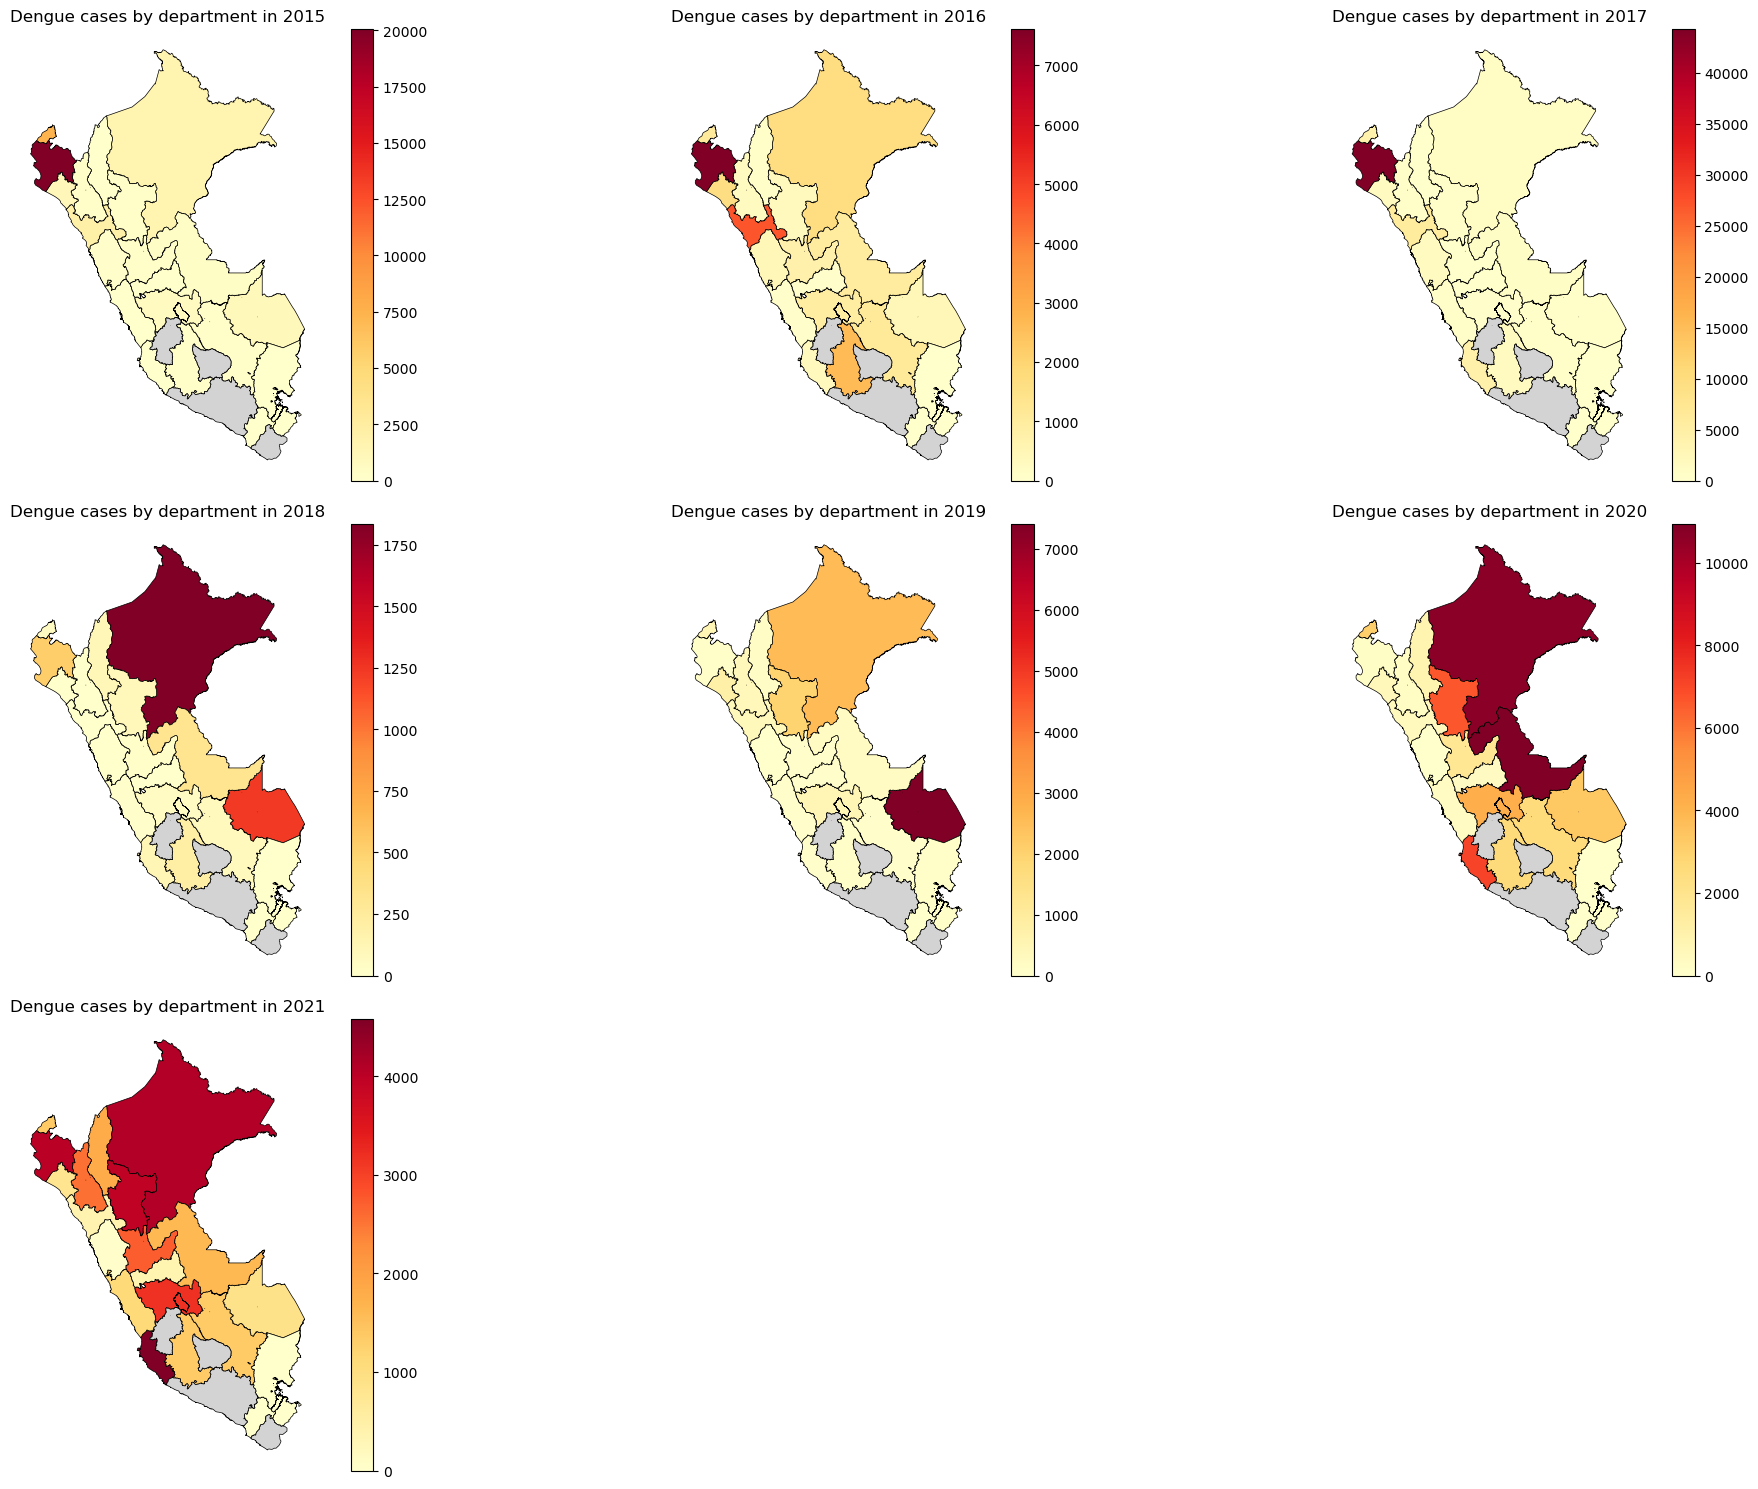

In [39]:
# Create a list with the years to be graphed (2015-2021)
years = list(range(2015, 2022))

# Setting up the figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))  # 3 rows and 3 columns for 7 years

# Flatten the subplot array for easy access
axes = axes.flatten()

# Iterate over each year and create a graph
for i, year in enumerate(years):
    # Filter dengue data for the current year
    dengue_year = dengue[dengue['Año'] == year]
    
    # Group cases by department
    cases_by_department = dengue_year.groupby('Departamento_Ubigeo')['Casos'].sum().reset_index()

    # Create department code from district shapefile (first 2 digits)
    districts_gdf['Departamento_Ubigeo'] = districts_gdf['UBIGEO'].str[:2]

    # Dissolve the districts to obtain geometry by department
    departments_gdf = districts_gdf.dissolve(by='Departamento_Ubigeo', aggfunc='sum').reset_index()

    # Merge case data with the departmental shapefile
    merged_gdf_department = departments_gdf.merge(cases_by_department, on='Departamento_Ubigeo', how='left')
    # Plot in the corresponding subplot
    ax = axes[i]
    merged_gdf_department.plot(column='Casos', cmap='YlOrRd', legend=True,
                               missing_kwds={"color": "lightgrey", "label": "No data"},
                               ax=ax, edgecolor="black", linewidth=0.5)
    
    # Adjust chart title
    ax.set_title(f'Dengue cases by department in {year}', fontsize=12)
    ax.set_axis_off()  # Turn off the axes

# Remove additional subplots if not used
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout so that the graphics do not overlap
plt.tight_layout()
plt.show()


## Step 6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots.

In [113]:
dengue_2021.head()

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Departamento_Ubigeo,Provincia_Ubigeo
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,15,1501
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,15,1501
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,15,1501


In [223]:
# Nueva columna 'Trimestre' basado en la columna 'Semana'
dengue_2021['Trimestre'] = pd.cut(dengue_2021['Semana'], bins=[0, 13, 26, 39, 53], labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Verificar los primeros registros para asegurarse de que los trimestres se han asignado correctamente
print(dengue_2021[['Semana', 'Trimestre']].head())
dengue_2021.head()

   Semana Trimestre
1      41        Q4
2      42        Q4
6      41        Q4
7      41        Q4
8      41        Q4


C:\Users\mcotrina\AppData\Local\Temp\ipykernel_26428\3671988320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021['Trimestre'] = pd.cut(dengue_2021['Semana'], bins=[0, 13, 26, 39, 53], labels=['Q1', 'Q2', 'Q3', 'Q4'])


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Departamento_Ubigeo,Provincia_Ubigeo,Trimestre
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801,Q4
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801,Q4
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,15,1501,Q4
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,15,1501,Q4
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,15,1501,Q4


In [225]:
# Agrupar los casos por 'Departamento_Ubigeo' y 'Trimestre'
dengue_departamento_trimestres = dengue_2021.groupby(['Departamento_Ubigeo', 'Trimestre'])['Casos'].sum().reset_index()

# Verificar la nueva base
dengue_departamento_trimestres.head()

C:\Users\mcotrina\AppData\Local\Temp\ipykernel_26428\3524975046.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dengue_departamento_trimestres = dengue_2021.groupby(['Departamento_Ubigeo', 'Trimestre'])['Casos'].sum().reset_index()


,Departamento_Ubigeo,Trimestre,Casos
0,01,Q1,599.0
1,01,Q2,609.0
2,01,Q3,583.0
3,01,Q4,39.0
4,02,Q1,3.0


In [227]:
# Cargar el shapefile de distritos (que será agregado a nivel departamental)
districts_gdf = gpd.read_file('../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

# Crear la columna 'Departamento_Ubigeo' en el shapefile
districts_gdf['Departamento_Ubigeo'] = districts_gdf['UBIGEO'].str[:2]

# Aplicar 'dissolve' para agregar los distritos a nivel departamental
departments_gdf = districts_gdf.dissolve(by='Departamento_Ubigeo', aggfunc='sum').reset_index()

# Unir el shapefile disuelto con los datos de dengue agregados por trimestre
merged_gdf_trimestres = departments_gdf.merge(dengue_departamento_trimestres, on='Departamento_Ubigeo', how='left')

# Verificar la unión de los datos
merged_gdf_trimestres.head()

,Departamento_Ubigeo,geometry,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,Trimestre,Casos
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",0101010101010101010101010101010101010101010101...,AMAZONASAMAZONASAMAZONASAMAZONASAMAZONASAMAZON...,0107070401010101050505060106050506050601050605...,CHACHAPOYASUTCUBAMBAUTCUBAMBACONDORCANQUICHACH...,0603020103101315172103020908141905110412070122...,CHUQUIBAMBACUMBACAJARURONIEVABALSASLEIMEBAMBAM...,CHUQUIBAMBACUMBACAJARUROSANTA MARIA DE NIEVABA...,0101060107030107020104010101030101100101130101...,0101010701070104010101010101010101050105010501...,0101060107030107020104010101030101100101130101...,3174,CHUQUIBAMBACUMBACAJARURONIEVABALSASLEIMEBAMBAM...,www.geogpsperu.comwww.geogpsperu.comwww.geogps...,9313812069313812069313812069313812069313812069...,juan.suyo@geogpsperu.comjuan.suyo@geogpsperu.c...,Q1,599.0
1,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",0101010101010101010101010101010101010101010101...,AMAZONASAMAZONASAMAZONASAMAZONASAMAZONASAMAZON...,0107070401010101050505060106050506050601050605...,CHACHAPOYASUTCUBAMBAUTCUBAMBACONDORCANQUICHACH...,0603020103101315172103020908141905110412070122...,CHUQUIBAMBACUMBACAJARURONIEVABALSASLEIMEBAMBAM...,CHUQUIBAMBACUMBACAJARUROSANTA MARIA DE NIEVABA...,0101060107030107020104010101030101100101130101...,0101010701070104010101010101010101050105010501...,0101060107030107020104010101030101100101130101...,3174,CHUQUIBAMBACUMBACAJARURONIEVABALSASLEIMEBAMBAM...,www.geogpsperu.comwww.geogpsperu.comwww.geogps...,9313812069313812069313812069313812069313812069...,juan.suyo@geogpsperu.comjuan.suyo@geogpsperu.c...,Q2,609.0
2,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",0101010101010101010101010101010101010101010101...,AMAZONASAMAZONASAMAZONASAMAZONASAMAZONASAMAZON...,0107070401010101050505060106050506050601050605...,CHACHAPOYASUTCUBAMBAUTCUBAMBACONDORCANQUICHACH...,0603020103101315172103020908141905110412070122...,CHUQUIBAMBACUMBACAJARURONIEVABALSASLEIMEBAMBAM...,CHUQUIBAMBACUMBACAJARUROSANTA MARIA DE NIEVABA...,0101060107030107020104010101030101100101130101...,0101010701070104010101010101010101050105010501...,0101060107030107020104010101030101100101130101...,3174,CHUQUIBAMBACUMBACAJARURONIEVABALSASLEIMEBAMBAM...,www.geogpsperu.comwww.geogpsperu.comwww.geogps...,9313812069313812069313812069313812069313812069...,juan.suyo@geogpsperu.comjuan.suyo@geogpsperu.c...,Q3,583.0
3,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",0101010101010101010101010101010101010101010101...,AMAZONASAMAZONASAMAZONASAMAZONASAMAZONASAMAZON...,0107070401010101050505060106050506050601050605...,CHACHAPOYASUTCUBAMBAUTCUBAMBACONDORCANQUICHACH...,0603020103101315172103020908141905110412070122...,CHUQUIBAMBACUMBACAJARURONIEVABALSASLEIMEBAMBAM...,CHUQUIBAMBACUMBACAJARUROSANTA MARIA DE NIEVABA...,0101060107030107020104010101030101100101130101...,0101010701070104010101010101010101050105010501...,0101060107030107020104010101030101100101130101...,3174,CHUQUIBAMBACUMBACAJARURONIEVABALSASLEIMEBAMBAM...,www.geogpsperu.comwww.geogpsperu.comwww.geogps...,9313812069313812069313812069313812069313812069...,juan.suyo@geogpsperu.comjuan.suyo@geogpsperu.c...,Q4,39.0
4,02,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",0202020202020202020202020202020202020202020202...,ANCASHANCASHANCASHANCASHANCASHANCASHANCASHANCA...,0312050505050505050505050103180909151515151616...,ANTONIO RAYMONDIHUAYLASBOLOGNESIBOLOGNESIBOLOG...,0106020305060711121314150505090102080910110102...,LLAMELLINPAMPAROMASABELARDO PARDO LEZAMETAANTO...,LLAMELLINPAMPAROMASLLACLLARAQUIACAJACAYCANISCH...,0203010212060205020205030205050205060205070205...,0203021202050205020502050205020502050205020502...,0203010212060205020205030205050205060205070205...,7411,LLAMELLINPAMPAROMASABELARDO PARDO LEZAMETAANTO...,www.geogpsperu.comwww.geogpsperu.comwww.geogps...,9313812069313812069313812069313812069313812069...,juan.suyo@geogpsperu.comjuan.suyo@geogpsp

C:\Users\mcotrina\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\mcotrina\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\mcotrina\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

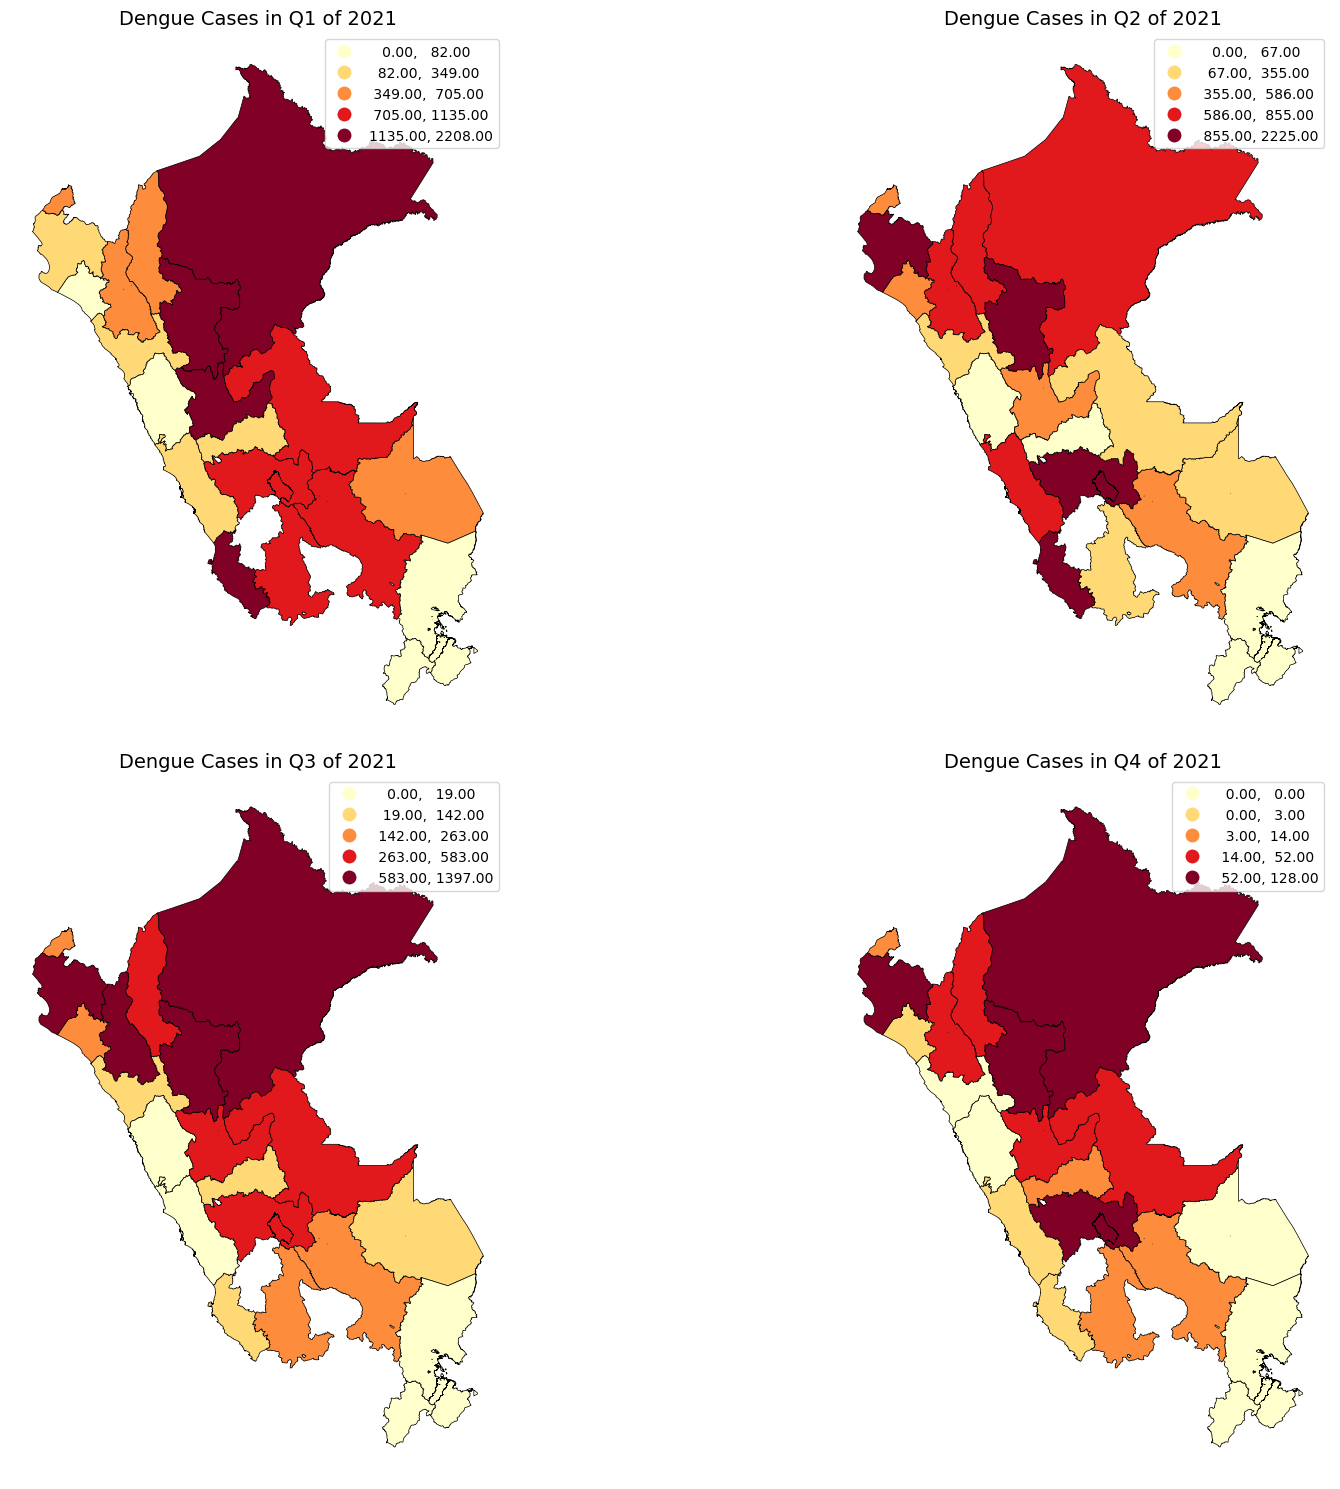

In [228]:
# Configuración de la figura con 4 subplots, uno por trimestre
fig, axes = plt.subplots(2, 2, figsize=(20, 15))  # 2 filas, 2 columnas
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# Iterar sobre los trimestres y crear un mapa para cada uno
for i, quarter in enumerate(quarters):
    ax = axes[i//2, i%2]  # Posicionar en el subplot correcto
    quarter_data = merged_gdf_trimestres[merged_gdf_trimestres['Trimestre'] == quarter]
    
    # Asegurarnos de que los valores faltantes (NA) están correctamente definidos como NaN
    quarter_data['Casos'] = quarter_data['Casos'].fillna(np.nan)
    
    # Graficar los casos para este trimestre utilizando cuartiles como esquema de clasificación
    quarter_data.plot(column='Casos', cmap='YlOrRd', legend=True, 
                      ax=ax, scheme='quantiles',edgecolor="black", linewidth=0.5,
                      missing_kwds={"color": "grey", "label": "No data"})
    
    # Añadir un título al subplot
    ax.set_title(f'Dengue Cases in {quarter} of 2021', fontsize=14)
    ax.set_axis_off()  # Desactivar ejes

# Ajustar los espacios entre subplots
plt.tight_layout()
plt.show()